In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")


 Load and Understand the Data

In [2]:
# Load the dataset
df = pd.read_csv('/content/customer_churn.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    int64  
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    int64  
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 70.4+ KB
None


In [4]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42,11066.80,0,7.22,8,30/08/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41,11916.22,0,6.50,11,13/08/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38,12884.75,0,6.67,12,29/06/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42,8010.76,0,6.71,10,22/04/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37,9191.58,0,5.56,9,19/01/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


Data Cleaning & Preprocessing

In [6]:
# Drop columns not useful for prediction
df = df.drop(['Names', 'Onboard_date', 'Location', 'Company'], axis=1)
# Check missing values
print(df.isnull().sum())

Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64


outlier (It refers to a data point that is different from the other observations in your dataset)

In [7]:
# Function to calculate outlier thresholds calculates the upper and lower limits for detecting outliers using the IQR (Interquartile Range) method.
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Function to check and optionally plot outliers, function checks for outliers in all numeric columns and can also plot boxplots for visual understanding.
def has_outliers(dataframe, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        outliers = dataframe[(dataframe[col] < low_limit) | (dataframe[col] > up_limit)]
        count = outliers.shape[0]
        if count > 0:
            print(f"{col}: {count} outliers")
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.title(f"Boxplot for {col}")
                plt.show()
        else:
            print(f"{col}: No outliers")

# detect numeric columns
numeric_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Run outlier check
has_outliers(df, numeric_variables, plot=True)

Age: No outliers
Total_Purchase: No outliers
Account_Manager: No outliers
Years: No outliers
Num_Sites: No outliers
Churn: No outliers


 Feature Selection


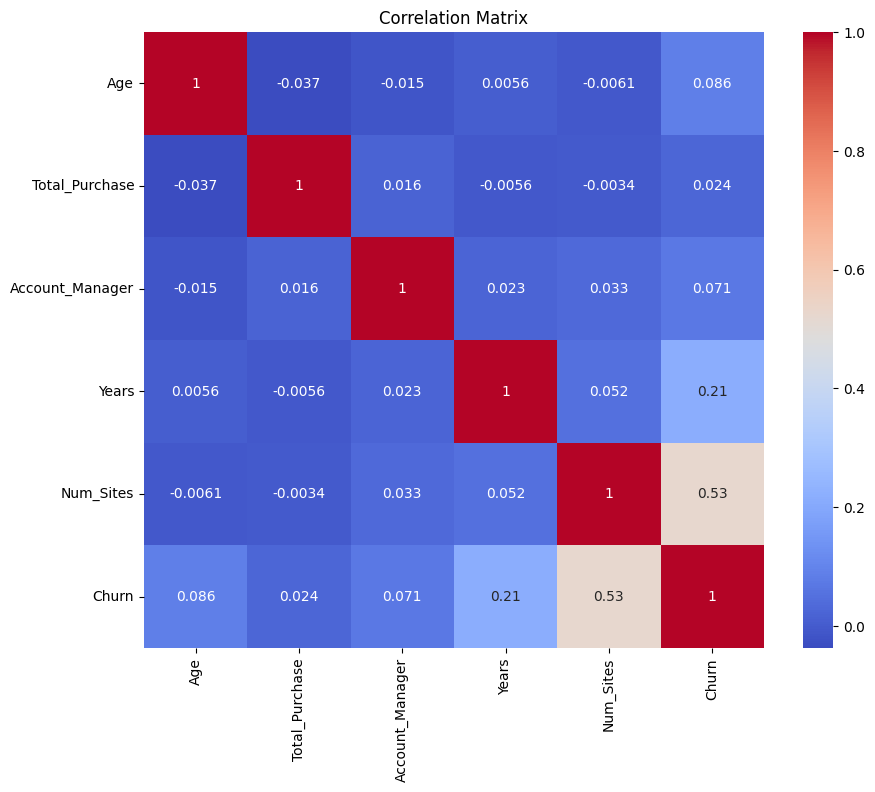

In [8]:
#Correlation Matrix
# Set the figure size for the heatmap (width=10, height=8)
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation between numeric columns
# - df.corr() computes the correlation matrix
# - annot=True displays the correlation values inside the heatmap cells
# - cmap='coolwarm' sets the color theme (blue for negative, red for positive correlations)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap plot
plt.show()



Feature Importance with XGBoost

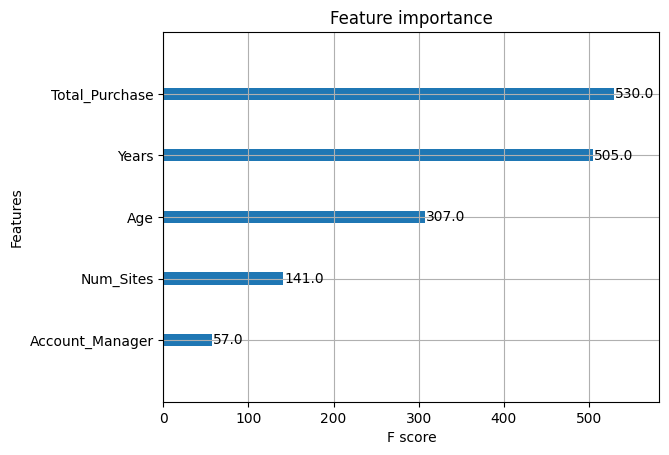

In [9]:
## What is XGBoost(**eXtreme Gradient Boosting**)?
## It's a powerful machine learning algorithm that builds an ensemble of decision trees using a method called **gradient boosting**.
### 🧠 How XGBoost Works (Simply):
# Builds many **small decision trees**, one after another.
# Each new tree **fixes the mistakes** of the previous ones.
# Combines all trees to make a strong prediction model.
X = df.drop('Churn', axis=1)
y = df['Churn']

model = xgb.XGBClassifier()
model.fit(X, y)

# Plot feature importance
xgb.plot_importance(model)
plt.show()



Model Building


🔍 Logistic Regression Results:
Accuracy: 0.9
Precision: 0.7692307692307693
Recall: 0.625
F1 Score: 0.6896551724137931
Confusion Matrix:
 [[142   6]
 [ 12  20]]


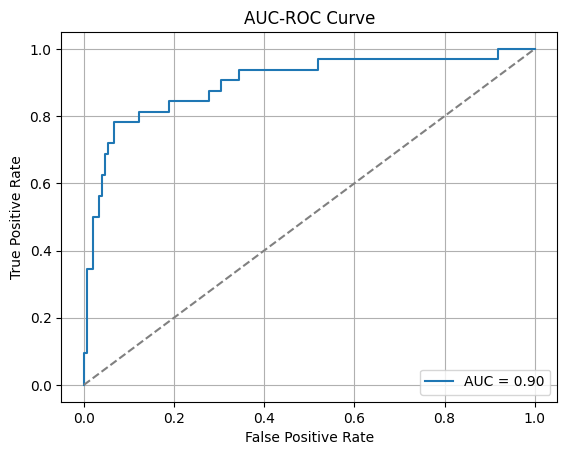


🔍 Decision Tree Results:
Accuracy: 0.8111111111111111
Precision: 0.46153846153846156
Recall: 0.375
F1 Score: 0.41379310344827586
Confusion Matrix:
 [[134  14]
 [ 20  12]]


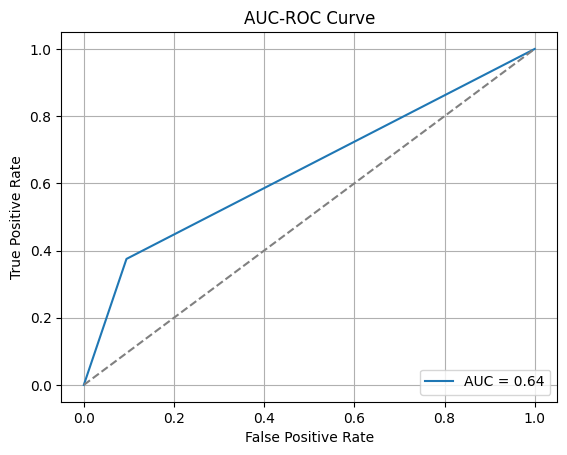


🔍 Random Forest Results:
Accuracy: 0.8777777777777778
Precision: 0.75
Recall: 0.46875
F1 Score: 0.5769230769230769
Confusion Matrix:
 [[143   5]
 [ 17  15]]


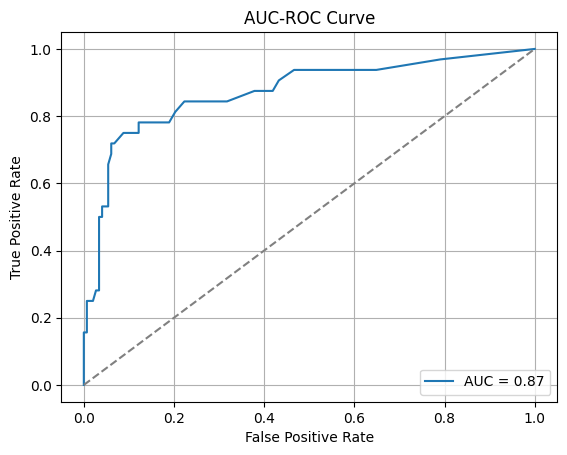


🔍 SVM Results:
Accuracy: 0.8611111111111112
Precision: 0.8181818181818182
Recall: 0.28125
F1 Score: 0.4186046511627907
Confusion Matrix:
 [[146   2]
 [ 23   9]]


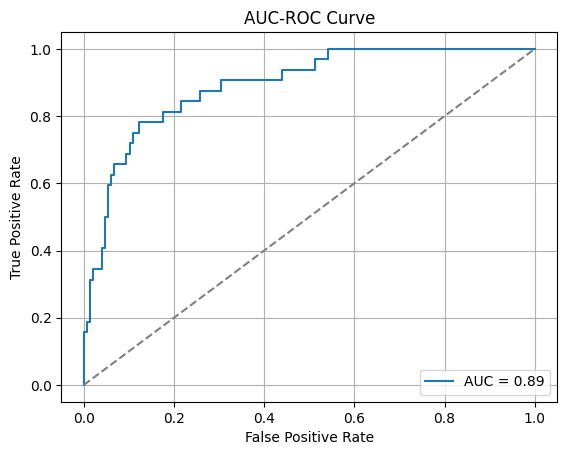


🔍 XGBoost Results:
Accuracy: 0.8611111111111112
Precision: 0.6842105263157895
Recall: 0.40625
F1 Score: 0.5098039215686274
Confusion Matrix:
 [[142   6]
 [ 19  13]]


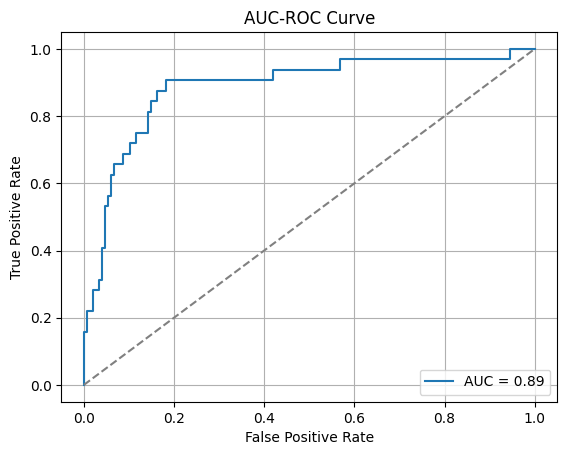

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
# Step 1: Split the data into train and test
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Scale the features to normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Create different machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # enable predict_proba for ROC
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Step 4: Define a function to generate the AUC-ROC curve
def generate_auc_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of churn (1)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Step 5: Train and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    print(f"\n🔍 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # 📉 AUC-ROC Curve(use scikit library also)
    generate_auc_roc_curve(model, X_test, y_test);

Hyperparameter Tuning (Example with XGBoost)

In [12]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees in the model
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]    # Step size shrinkage used to prevent overfitting
}

# Initialize GridSearchCV with:
# - XGBoost Classifier
# - param_grid specifying hyperparameters to try
# - cv=5 for 5-fold cross-validation (splits training data into 5 parts)
# - scoring='f1' means evaluation metric to choose best params is F1 Score
grid = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1  # Optional: shows progress of search
)

# Fit the GridSearchCV object on training data (this tries all parameter combinations)
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Save the best estimator (model with best found parameters) for later use
best_model = grid.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


Final Model Evaluation


📌 Final Model Evaluation:
Accuracy: 0.8666666666666667
Precision: 0.7222222222222222
Recall: 0.40625
F1 Score: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       148
           1       0.72      0.41      0.52        32

    accuracy                           0.87       180
   macro avg       0.80      0.69      0.72       180
weighted avg       0.85      0.87      0.85       180



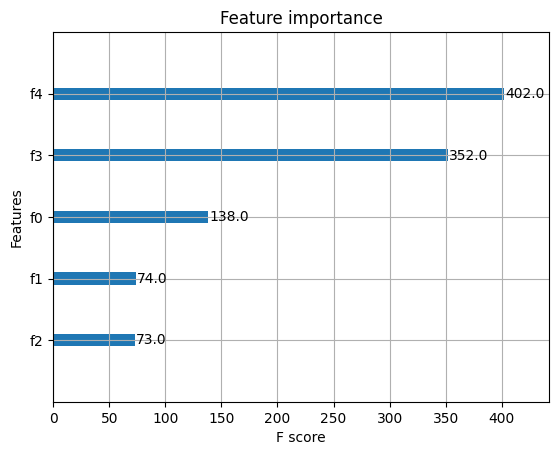

In [13]:
y_final_pred = best_model.predict(X_test)

print("\n Final Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_final_pred))
print("Precision:", precision_score(y_test, y_final_pred))
print("Recall:", recall_score(y_test, y_final_pred))
print("F1 Score:", f1_score(y_test, y_final_pred))
print("Classification Report:\n", classification_report(y_test, y_final_pred))

# Final Feature Importance
xgb.plot_importance(best_model)
plt.show()


In [15]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame to store actual and predicted values side by side
results_df = pd.DataFrame({
    'Actual': y_test.values,   # Convert Series to array for alignment
    'Predicted': y_pred
})

# Optionally, add a column for prediction correctness
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Display last 10 rows to review
print(results_df.tail(10))


     Actual  Predicted  Correct
170       0          0     True
171       0          0     True
172       1          0    False
173       0          0     True
174       0          0     True
175       0          0     True
176       0          1    False
177       0          0     True
178       1          0    False
179       1          0    False
